In [1]:
from private.hypergraph import Hypergraph, hg_to_mol
from grammar_generation import random_produce

from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
from copy import deepcopy
import pickle5 as pickle
import torch
from os import listdir

In [2]:
expr_name_dict = dict()
expr_name_dict['polymer_117motif'] = 'grammar-log/log_117motifs'
expr_name_dict['iso'] = 'grammar-log/log_iso'
expr_name_dict['acrylates'] = 'grammar-log/log_acy'
expr_name_dict['chain_extender'] = 'grammar-log/log_ce'

expr_names = list(expr_name_dict.keys())
generated_mols = dict()
for expr_name in expr_names:
    print('\ndealing with {}'.format(expr_name))

    # traverses directory and find the ckpt with highest R
    ckpt_list = listdir(expr_name_dict[expr_name])
    max_R = 0
    max_R_ckpt = None
    for ckpt in ckpt_list:
        if 'grammar' in ckpt:
            curr_R = float(ckpt.split('_')[4][:-4])
            if curr_R > max_R:
                max_R = curr_R
                max_R_ckpt = ckpt

    print('loading {}'.format(max_R_ckpt))
    with open('{}/{}'.format(expr_name_dict[expr_name], max_R_ckpt), 'rb') as fr:
        grammar = pickle.load(fr)

    for i in range(8):
        mol, _ = random_produce(grammar)

        if expr_name not in generated_mols.keys():
            generated_mols[expr_name] = [mol]
        else:
            generated_mols[expr_name].append(mol)



dealing with polymer_117motif
loading best_grammar_epoch_34_1.2933534609346415.pkl
COc1ccc2cc(C(C)=O)ccc2c1
Cn1c(=O)c2ccc3c4ccccc4c4ccc(cc4-3)cc2c1=O
C#Cc1cc2c(s1)C1=C(c3sccc3C1(C)C)C2(C)C
C#Cc1scc2c1C(=O)[Si](C)(C)C2=O
C#Cc1scc2c1C(=O)[Si](C)(C)C2=O
c1ccc2c(c1)c1ccc3cc4c5ccccc5c5ccc(ccc3cc3ccc2c-1c3)cc5-4
CC(C)(C)c1ccc2cc3ccc4c(c3)-c(ccc2c1)c1ccccc14
C#Cc1nc2c(s1)-c1scnc1C2(C)C

dealing with iso
loading best_grammar_epoch_52_0.8909308481417055.pkl
O=C=NCc1cc(N=C=O)ccc1N=C=O
O=C=NCCCCCCCCCCCCCCCCCCc1ccc(Cc2ccc(CN=C=O)cc2)cc1CN=C=O
C1CCCCCCCCCCCCCCCCCCCCCC1
CN=C=O
O=C=NCCCCCCCCCCCCCCCCCCCCCCC1=CC=C2C=CC(CN=C=O)=CC=C(C=C1CN=C=O)C2
C1CCCCCCCCCCCCCC1
O=C=NC1CCCCCCCCCCCCCCCCCCC1
O=C=NCCCCCCCCCCCCCCCCCCN=C=O

dealing with acrylates
loading best_grammar_epoch_26_1.2318563198913763.pkl
C=CC(=O)OCCC
C=CC(=O)OCCC
C=CC(=O)CCCOC(=O)C=C
CC(C)Cc1ccccc1
C=CC(=O)C(=O)F
Cc1ccccc1
C=CC(=O)OOC(C)=O
C=CC(=O)C(CC)(CCCCC)c1ccccc1

dealing with chain_extender
loading best_grammar_epoch_14_1.1837988155284098

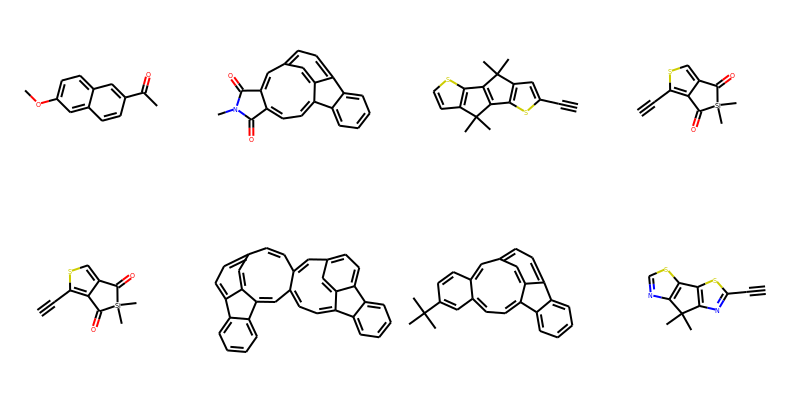

In [3]:
Chem.Draw.MolsToGridImage(generated_mols['polymer_117motif'], molsPerRow=4, subImgSize=(200,200))

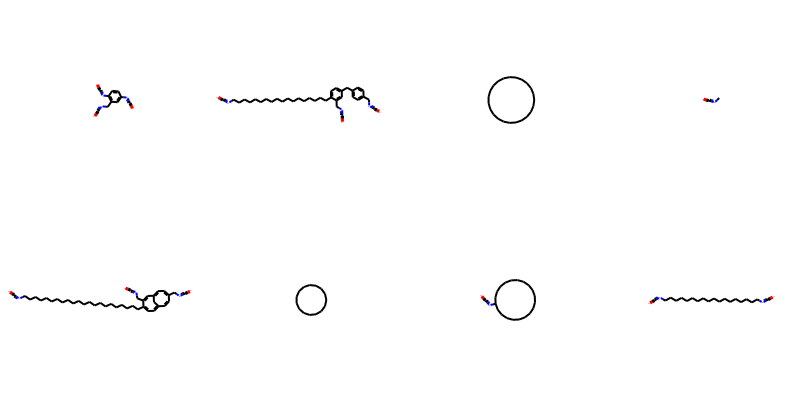

In [4]:
Chem.Draw.MolsToGridImage(generated_mols['iso'], molsPerRow=4, subImgSize=(200,200))

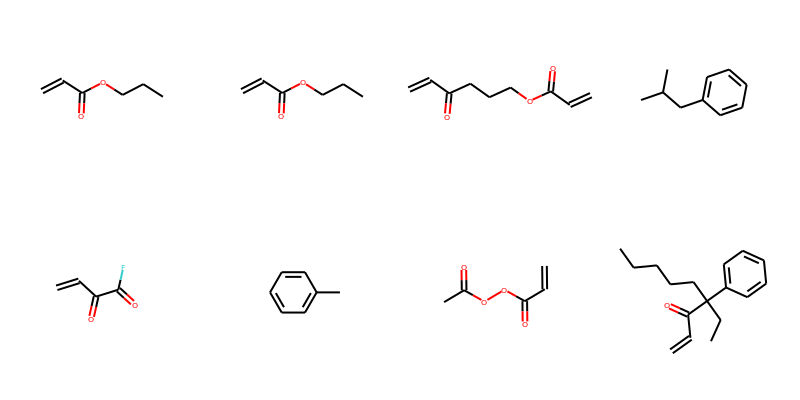

In [5]:
Chem.Draw.MolsToGridImage(generated_mols['acrylates'], molsPerRow=4, subImgSize=(200,200))

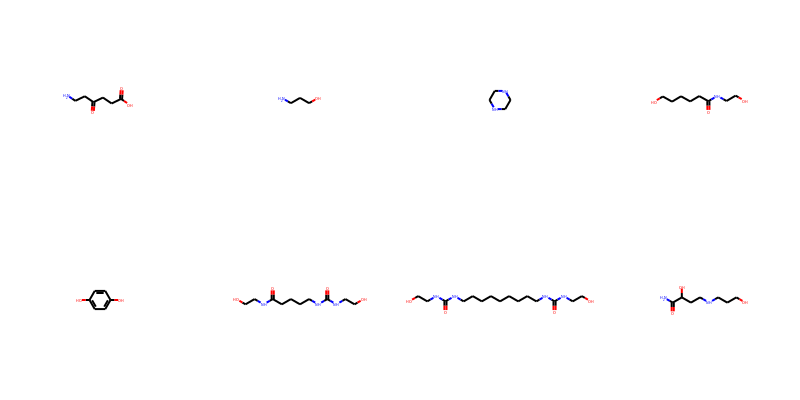

In [6]:
Chem.Draw.MolsToGridImage(generated_mols['chain_extender'], molsPerRow=4, subImgSize=(200,200))